### importing libraries

In [14]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [15]:
#create synthetic dataset 
from sklearn.datasets import make_classification
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1,n_redundant=0)

In [16]:
pd.DataFrame(X)[0]

0     -0.058252
1     -0.770876
2     -1.755817
3     -0.386405
4      0.332382
         ...   
995   -1.344152
996    0.127892
997    0.228387
998   -0.533987
999    1.949947
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

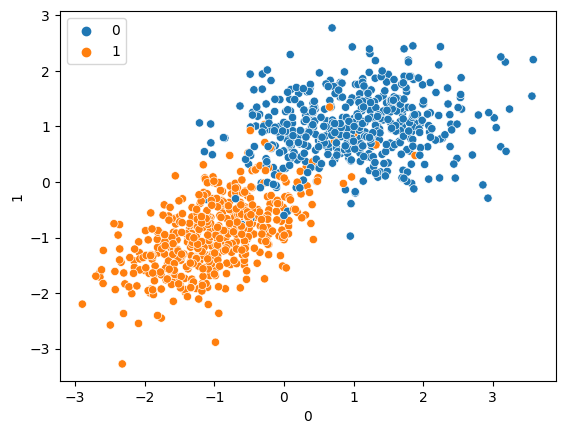

In [17]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [47]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [48]:
#prediction 
y_pred=svc.predict(X_test)

In [45]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.944
[[115   8]
 [  6 121]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       123
           1       0.94      0.95      0.95       127

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



### hyperperameter tuning with different data


In [49]:
from sklearn.datasets import make_classification
X1,y1=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

<Axes: xlabel='0', ylabel='1'>

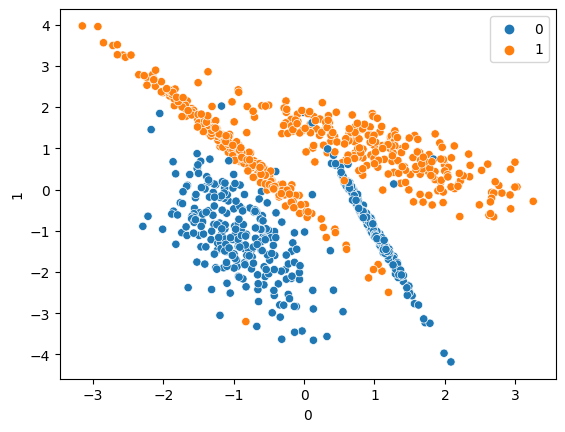

In [50]:
sns.scatterplot(x=pd.DataFrame(X1)[0],y=pd.DataFrame(X1)[1],hue=y1)

In [51]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.25,random_state=10)

In [52]:
from sklearn.model_selection import GridSearchCV
# defining peremeter range 
param_grid={'C':[0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['poly','linear','rbf','sigmoid']
}

In [53]:
SVC()

SVC()

In [54]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [55]:
grid.fit(X1_train,y1_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.827 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.867 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.907 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.887 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.900 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.853 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.880 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.913 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.887 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.887 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rb

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['poly', 'linear', 'rbf', 'sigmoid']},
             verbose=3)

In [56]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [57]:
y_pred1=grid.predict(X1_test)

In [59]:
from sklearn.metrics import  accuracy_score,classification_report,confusion_matrix
# print(accuracy_score(y_test,y_pred1 ))
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[60 63]
 [64 63]]
              precision    recall  f1-score   support

           0       0.48      0.49      0.49       123
           1       0.50      0.50      0.50       127

    accuracy                           0.49       250
   macro avg       0.49      0.49      0.49       250
weighted avg       0.49      0.49      0.49       250

